# Percolation: Forest Fire 

Percolation theory is a branch of statistical physics and probability theory that deals with the behavior of connected clusters in random networks or lattices. In the simplest case, we can think of a grid of squares, where each square can be either "occupied" or "empty" with a certain probability.

The percolation threshold is the critical probability at which a system undergoes a phase transition from having isolated clusters to having a connected cluster that spans the entire system.

You can further review this in Chapter 15 in **Schroeder, 1991: Percolation: From Forest Fires to Epidemics.**

Here we're writing a code to better understand percolation theory and the percolation threshold by modeling a forest fire grid through the following steps: 
1. **Grid:** We initlize the grid by setting each square to be either "occupied" with a living tree or "empty" with no tree. Each square is assigned a probability to represent the liklihood of a tree being present 
2. **Ignition point:** An ignition point is set on the grid where the fire starts. In the code below, we set the entire top row to be a "burning tree" aka the ignition point. 
3. **Spread Rules:** Define rules for how the fire spreads across the grid. This can be done based on wind direction, any environmental factors, and the probability of ignition of neighboring cells. In the case below, if a living tree is next to a burning tree, it will be a burning tree in the next iteration.
4. **Simulation:** Simulate the spread of fire on the grid. You can use techniques like Monte Carlo simulations that iteratively update the state of each grid points based on the spread rules
5. **Percolated Grid Point:** A grid point is "percolated" if it is part of a connected cluster that spans the grid from one edge to the other (our forest fire), allowing for the flow to be modeled 

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


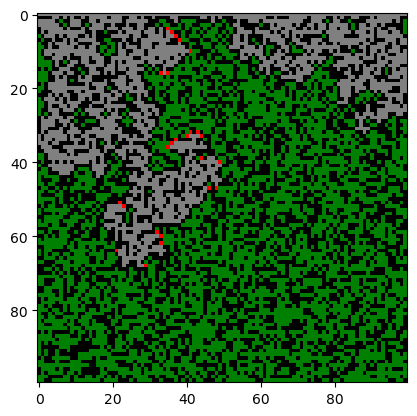

In [4]:
from itertools import product
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

Nx, Ny = Nxy = (100, 100) # grid size 
rng = np.random.default_rng(seed=2024) # choose random seed 
pc = 0.5927460507921 # averaged percolation threshold from Albinet 

# 0: no tree
# 1: living tree
# 2: burning tree
# 3: burnt tree

# initialize grid with trees and no trees 
X = rng.choice(2, size=Nxy, p=[1-pc, pc]) # probabilty range from percolation threshold

# make slightly large array to add ghost-points to simplify testing
X0_ = np.zeros((Nx+2, Ny+2))
X0_[1:-1, 1:-1] = X
X0_[1, 1:-1] = 2   # set top row to burning tree

# some plotting routines
cm = ListedColormap(["black", "green", "red", "grey"])
def draw(X_, ax=None):
    if ax is None:
        ax = plt.gca()
    ax.imshow(X_[1:-1, 1:-1], cmap=cm, vmin=0, vmax=3)

# update grid based on the spread rules 
def update1(X_):
    Nx, Ny = X_[1:-1, 1:-1].shape
    Xnew_ = X_.copy() 
    burning = np.where(X_ ==  2) # find burning grid points 
    Xnew_[burning] = 3  # make all burning trees burnt in next iteration 

    # track whether or not a grid point is percolated 
    percolated = False
    
    # in the points that are burning 
    for ix, iy in zip(*burning):
        for d in (-1, +1):
            if X_[ix+d, iy] == 1:
                Xnew_[ix+d, iy] = 2
            if X_[ix, iy+d] == 1:
                Xnew_[ix, iy+d] = 2
            if ix == Nx:
                percolated = True

    return Xnew_, percolated 

X_ = X0_
percolated = False 

# change this parameter 
runs = 100

%time 
for n in range(runs): 
    X_, percolated = update1(X_)
    if percolated:
        break
draw(X_)


### Finding the percolation threshold

Now we want to write an algorithm to find the percolation threshold. We can create a function to do that by checking to see if a grid point has "percolated". This means that it is part of a connected path of points in a grid or lattice through which some substance (such as a liquid or gas) can flow from one side of the grid to the other.

In [5]:
def percolation_threshold(Nxy, runs):
    results = []
    # probability 
    for p in np.linspace(0, 1, num=100):
        pc_count = 0
        for i in range(runs):
            # use the same grid as above but with probability threshold not dependent on the percolation threshold
            X = rng.choice(2, size=Nxy, p=[1-p, p])
            if has_percolating_path(X):
                pc_count += 1
        fraction_percolated = pc_count runsls
        results.append((p, fraction_percolated))
    return results

def has_percolating_path(lattice):
    # check for percolation using depth-first search
    def dfs(i, j, burning):
        # check if out of bounds
        if i < 0 or i >= len(lattice) or j < 0 or j >= len(lattice[0]) or lattice[i][j] == 0 or burning[i][j]:
            return False
        # otherwise 
        burning[i][j] = True
        if i == len(lattice) - 1:
            return True
        return (dfs(i+1, j, burning) or dfs(i-1, j, burning) or dfs(i, j+1, burning) or dfs(i, j-1, burning))
    
    burning = [[False]*len(lattice[0]) for i in range(len(lattice))]
    
    for j in range(len(lattice[0])):
        if dfs(0, j, burning):
            return True
    return False

Now that we have all the elements needed to calculate the percolation threshold proabability (probability and the fraction of percolating configurions) we can analyze those results

In [ ]:
# call the results 


# plot the results (fraction of percolating configurations vs. probability)


In [ ]:
# create an array for the results if you haven't already
# find the indices where the fraction of percolating configurations aren't 0 or 1 
# np.where or np.logical_and may help for this part 


In [ ]:
# to find the percolation threshold, fit the indices above to find the center of the plot
# you can use any technique you'd like but least squares works well! 
# you can also use a sigmoid to find the transition
from scipy.optimize import least_squares



